In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.dpi'] = 150

In [3]:
prices = pd.concat([pd.read_excel('./data/2010_queens.xls', header=3),
                    pd.read_excel('./data/2010_bronx.xls', header=3),
                    pd.read_excel('./data/2010_brooklyn.xls', header=3),
                    pd.read_excel('./data/2010_manhattan.xls', header=3),
                    pd.read_excel('./data/2010_statenisland.xls', header=3)
                    ])

SAT_scores = pd.read_csv('./data/SAT__College_Board__2010_School_Level_Results_20231216.csv')

high_schools = pd.read_csv('./data/2014_-_2015_DOE_High_School_Directory_20231216.csv')

zip_codes = gpd.read_file('./data/Modified Zip Code Tabulation Areas (MODZCTA)_20231216.geojson')

In [4]:
residential_building_class_categories = [
   '01  ONE FAMILY HOMES                        ',
   '12  CONDOS - WALKUP APARTMENTS              ',
   '02  TWO FAMILY HOMES                        ',
   '03  THREE FAMILY HOMES                      ',
   '04  TAX CLASS 1 CONDOS                      ',
   '07  RENTALS - WALKUP APARTMENTS             ',
   '08  RENTALS - ELEVATOR APARTMENTS           ',
   '09  COOPS - WALKUP APARTMENTS               ',
   '10  COOPS - ELEVATOR APARTMENTS             ',
   '13  CONDOS - ELEVATOR APARTMENTS            ',
   '14  RENTALS - 4-10 UNIT                     ',
   '15  CONDOS - 2-10 UNIT RESIDENTIAL          ',
   '17  CONDOPS                                 ',
   '23  LOFT BUILDINGS                          ',
   '16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
   '11A CONDO-RENTALS                           '
]

In [5]:
prices = prices[prices['BUILDING CLASS CATEGORY'].isin(residential_building_class_categories)]

In [6]:
prices = prices[['ZIP CODE', 'SALE PRICE']]
prices = prices[prices['SALE PRICE']!=0]

In [7]:
mean_prices = prices.groupby('ZIP CODE').agg(['mean', 'count'])

In [8]:
merged_df = zip_codes.copy()

In [9]:
merged_df['Mean Housing Sale Price'] = 0
merged_df['Mean Housing Sale Price'] = np.random.randint(7, size=len(merged_df.index))

/var/folders/76/fwbywfj159x2s03lvczby1380000gn/T/ipykernel_44793/559037317.py:3: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(


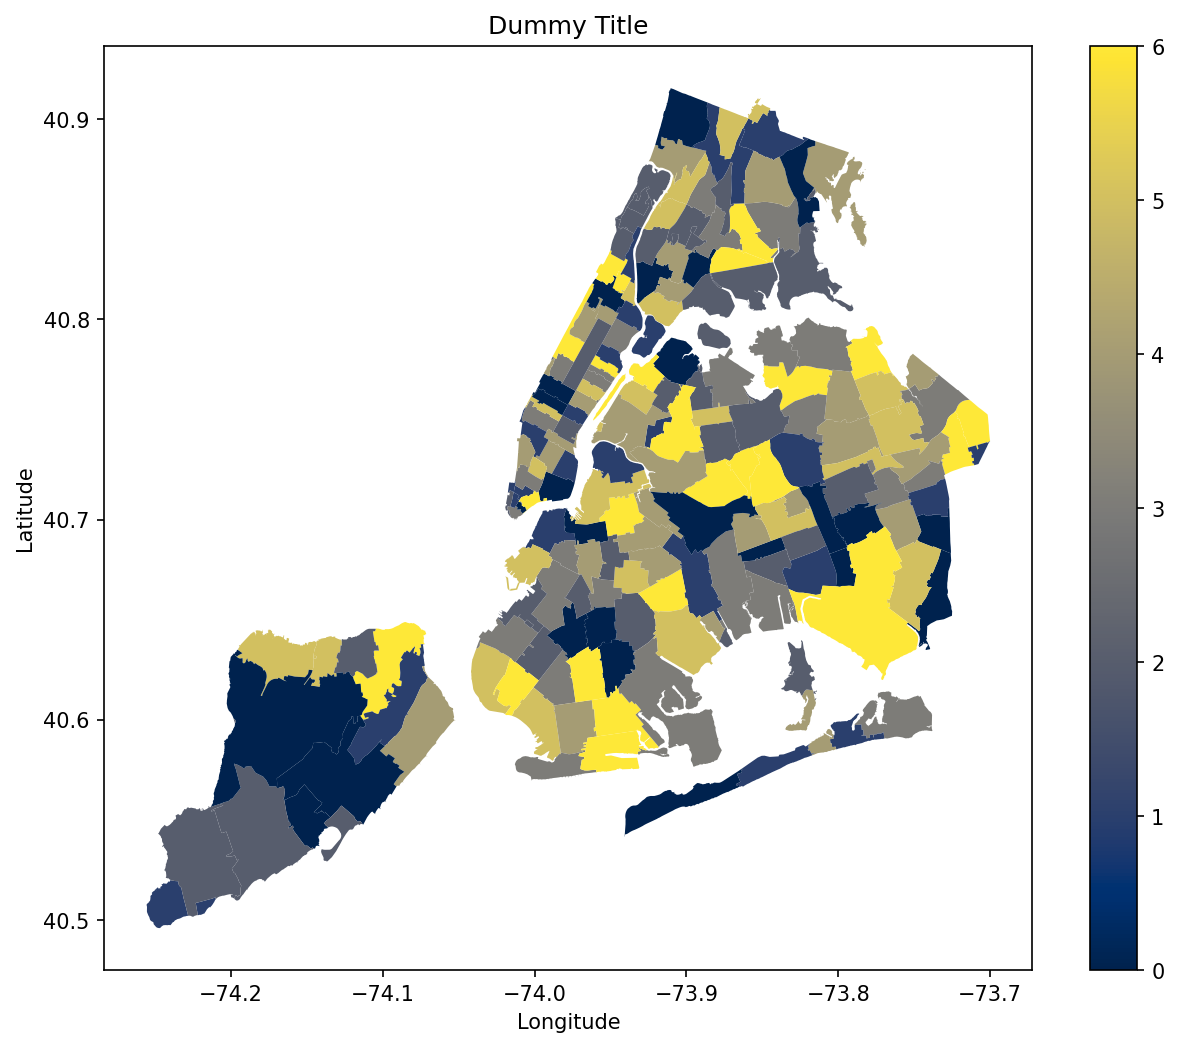

In [10]:
fig, ax = plt.subplots(1, figsize = (10, 8))
ax = merged_df.plot(column='Mean Housing Sale Price', cmap='cividis', ax=ax)
plt.colorbar(
    plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(
        vmin=merged_df['Mean Housing Sale Price'].min(),
        vmax=merged_df['Mean Housing Sale Price'].max())))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dummy Title')
plt.show();

In [11]:
manhattan = pd.read_excel('./data/2010_manhattan.xls', header=3)
manhattan.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')